In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pypsa
import pandas as pd
import numpy as np

plt.style.use(["bmh", "../../matplotlibrc"])
sns.set_palette("colorblind")

In [2]:
colors = sns.color_palette("colorblind")

/tmp/ipykernel_110564/1229388017.py:26: RuntimeWarning: divide by zero encountered in power
  ax.plot(d, 120 * (d-10)**-.6 - 8, c=colors[3], linestyle="--", label="log-linear")


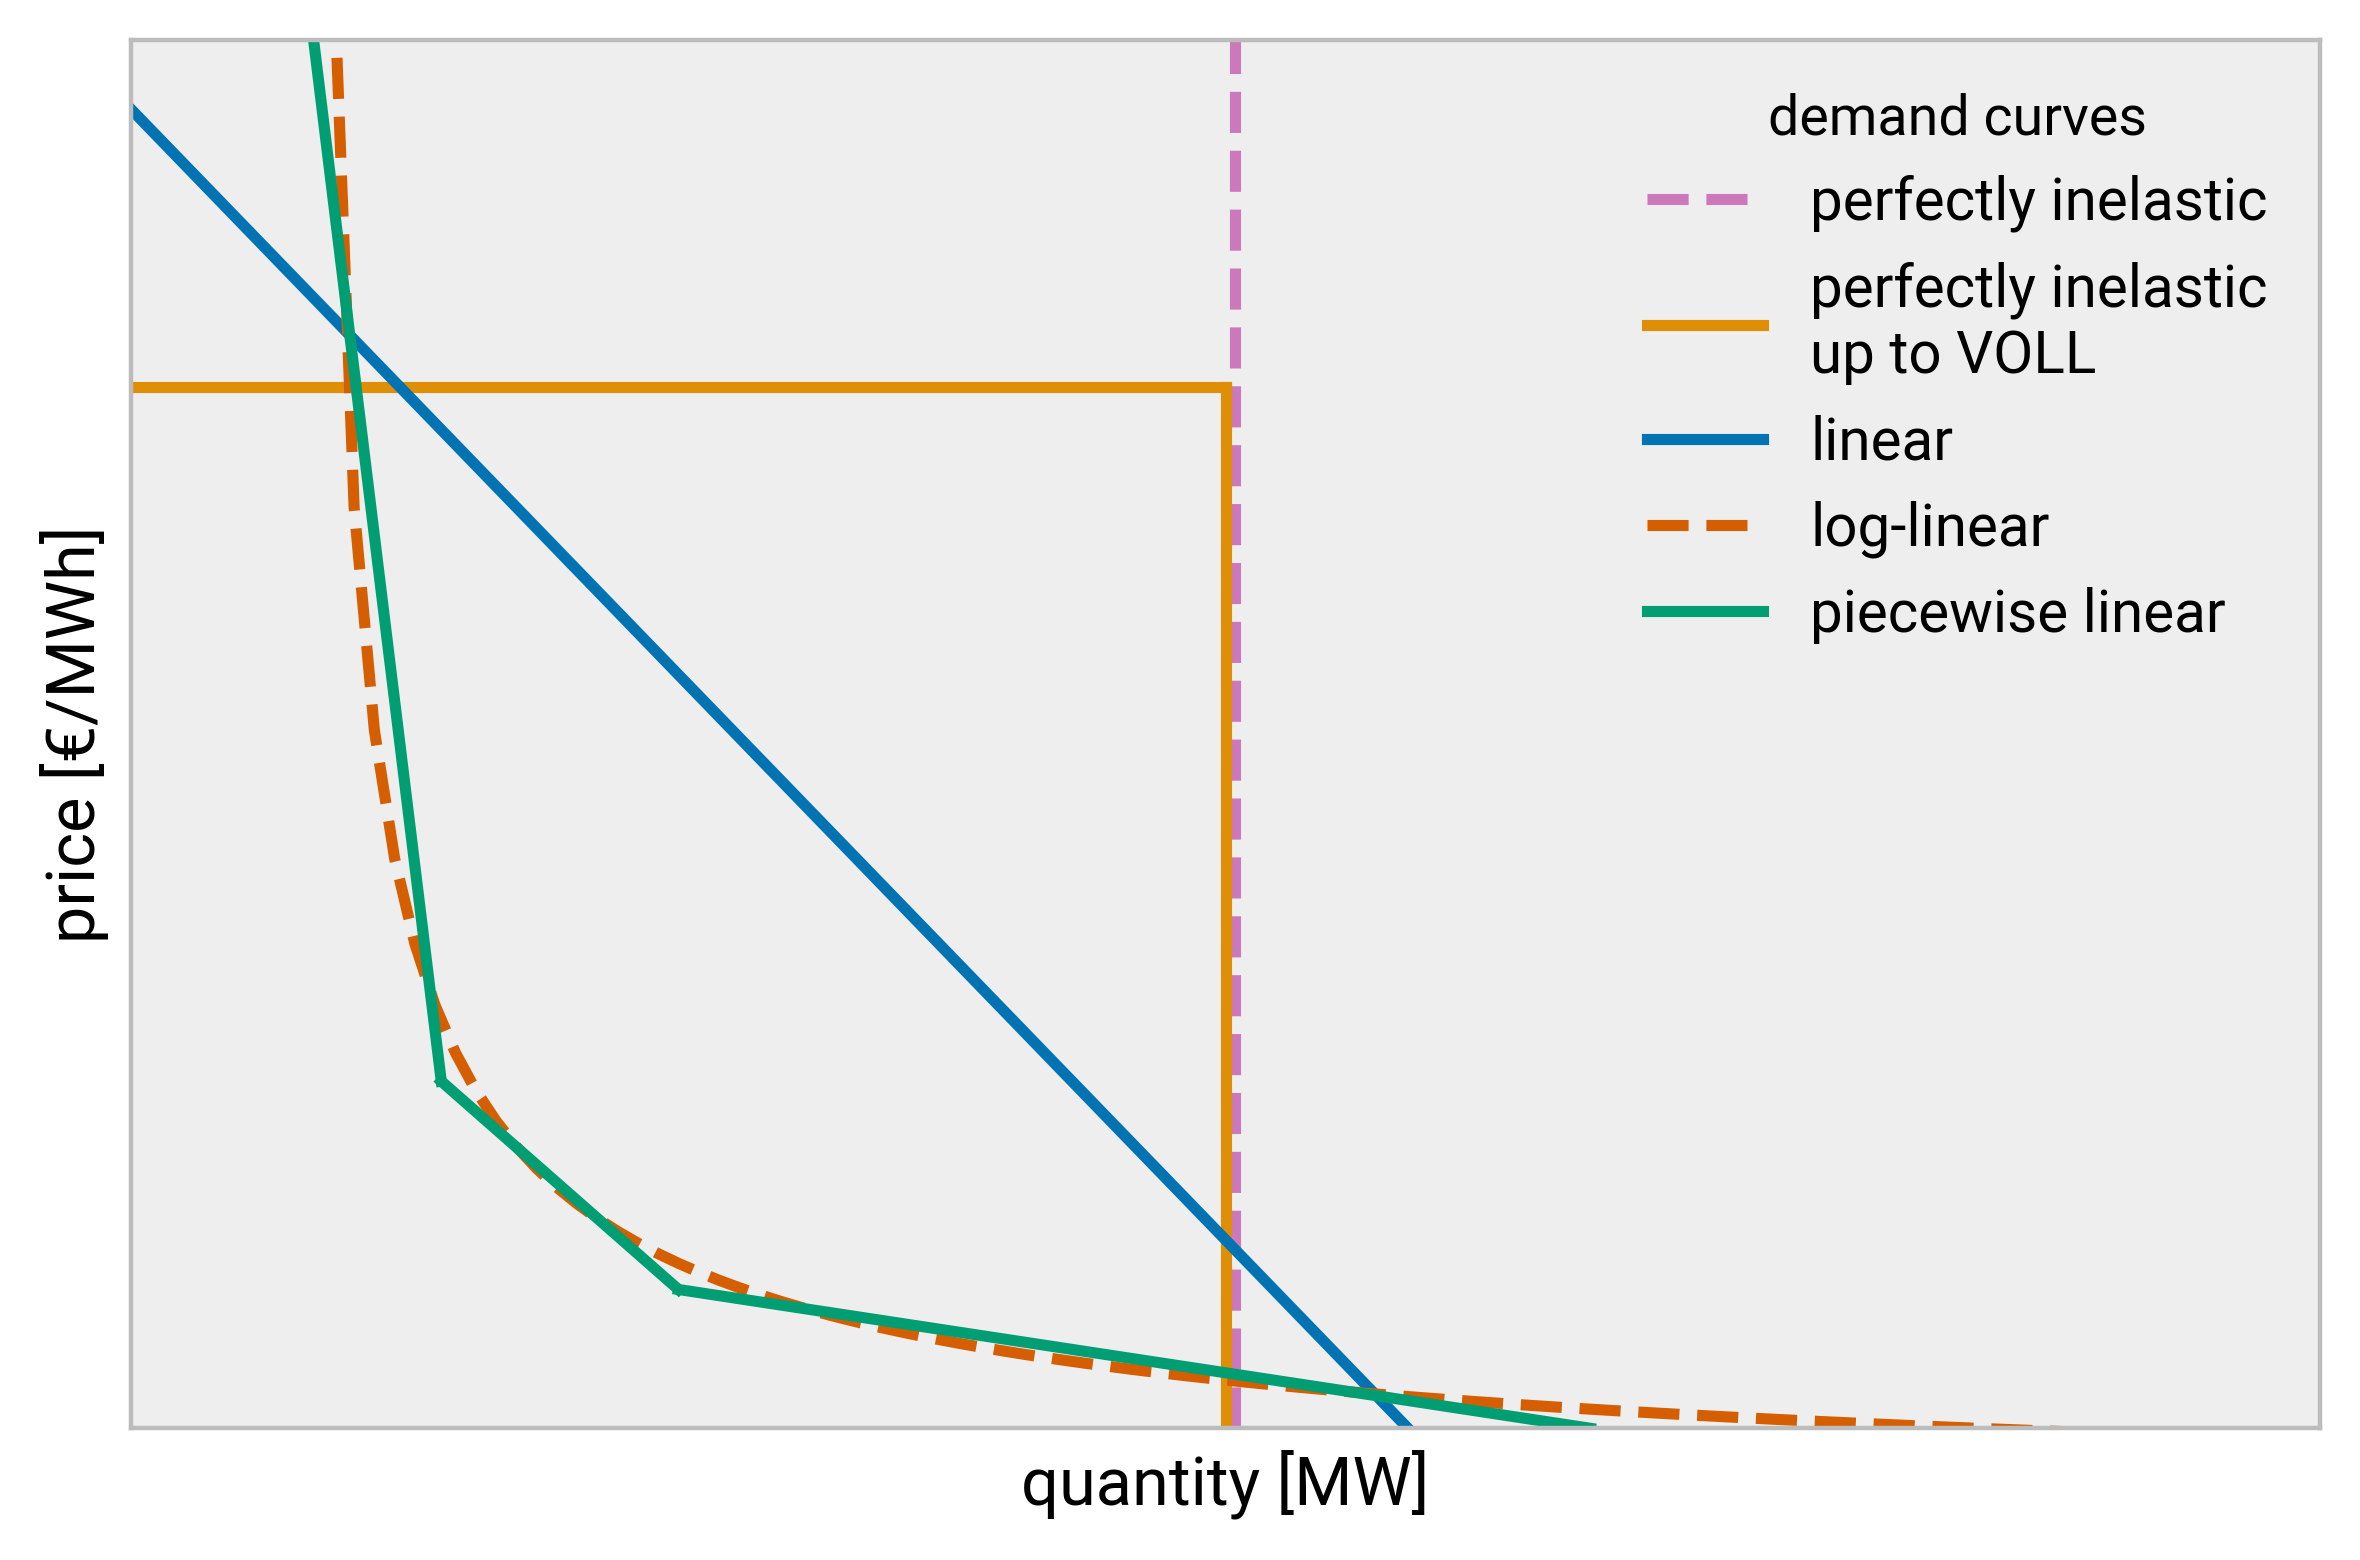

In [3]:
fig, ax = plt.subplots(figsize=(6,4))



# inelastic
ax.axvline(60.5, c=colors[4], linestyle="--", label="perfectly inelastic")


# VOLL
c = colors[1]
x = [0, 60]
y = [75, 75]
ax.plot(x, y, c=c, label="perfectly inelastic\nup to VOLL")

x = [60, 60]
y = [75, 0]
ax.plot(x, y, c=c)


# linear demand curve
d = np.linspace(0, 70, 100)
ax.plot(d, 95 - 95/70 * d, c=colors[0], label="linear")

# log-log function
d = np.linspace(10, 120, 100)
ax.plot(d, 120 * (d-10)**-.6 - 8, c=colors[3], linestyle="--", label="log-linear")

# PWL
c = colors[2]
cross1 = [17, 25]
cross2 = [30, 10]

x = [10, cross1[0]]
y = [100, cross1[1]]
ax.plot(x, y, c=c, label="piecewise linear")

x = [cross1[0], cross2[0]]
y = [cross1[1], cross2[1]]
ax.plot(x, y, c=c)

x = [cross2[0], 80]
y = [cross2[1], 0]
ax.plot(x, y, c=c)

ax.set_ylim(0, 100)
ax.set_xlim(0, 120)

ax.set_ylabel("price [€/MWh]")
ax.set_xlabel("quantity [MW]")

ax.set_xticks([])
ax.set_yticks([])

plt.legend(loc="upper right", title="demand curves", fontsize=10.5)

plt.tight_layout()

for ext in ["pdf", "png"]:
    plt.savefig(f"../../resources/figure-elasticity.{ext}", bbox_inches='tight')